# 暗号通貨間の相関関係の分析

ビットコイン、イーサリアム、リップル、ライトコインの対米ドルの相関関係を調査した。

データは[Cryptocurrency Market Capitalizations](https://coinmarketcap.com/)のデータを使用した。

In [21]:
import requests
from datetime import datetime
import pandas as pd


def fetch_list(coin_type):
    # Cryptocurrency Market Capitalizations (https://coinmarketcap.com/) から拝借
    r = requests.get('https://graphs.coinmarketcap.com/currencies/%s/' % coin_type)
    data = r.json()
    data = data['price_usd'][0:-1]

    arr = []
    first = data[0][1]
    for d in data:
        # コインによって微妙に取得時刻が違うがそのずれは無視して、日付情報にしてしまう。
        date = datetime.fromtimestamp(int(d[0]) / 1000).date()
        value = d[1] / first
        arr.append({"date": date, "value": value})
    result = pd.DataFrame(index=[t["date"] for t in arr])
    result[coin_type] = [t["value"] for t in arr]
    return result

data_frames = []
coins = ["bitcoin", "ethereum", "ripple", "litecoin"]
for coin in coins:
    data_frames.append(fetch_list(coin))

data = pd.concat(data_frames, axis=1, join='inner')

In [10]:
data[:1].index[0]

datetime.date(2015, 8, 7)

In [11]:
data[-1:].index[0]

datetime.date(2017, 10, 21)

### 2015/8/7 からの2017/10/21の価格変化

* 全通貨、2015/8/7時点の値を1に揃えている

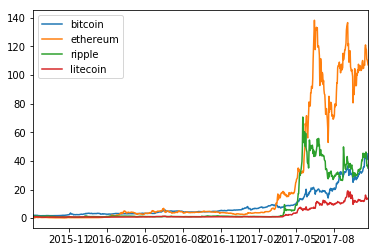

In [22]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

data.plot()

* 2017年以前が潰れてしまうので、対数化したグラフも用意した

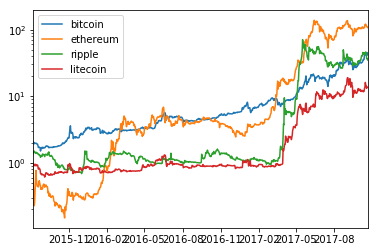

In [23]:
data.plot(logy=True)

### 全データによる相関関係

* 2015/8/7 ~ 2017/10/21(現在)

In [24]:
data.corr()

,bitcoin,ethereum,ripple,litecoin
bitcoin,1.000000,0.942633,0.847594,0.952555
ethereum,0.942633,1.000000,0.917577,0.960823
ripple,0.847594,0.917577,1.000000,0.889792
litecoin,0.952555,0.960823,0.889792,1.000000


### 1年間の相関関係

In [25]:
# 1年分 (欠損値があるためか、363になっている。)
data[-363:].corr()

,bitcoin,ethereum,ripple,litecoin
bitcoin,1.000000,0.917400,0.772459,0.937823
ethereum,0.917400,1.000000,0.879420,0.942978
ripple,0.772459,0.879420,1.000000,0.839592
litecoin,0.937823,0.942978,0.839592,1.000000


### 1ヶ月の相関関係

In [26]:
data[-31:].corr()

,bitcoin,ethereum,ripple,litecoin
bitcoin,1.000000,0.790301,0.666455,0.818199
ethereum,0.790301,1.000000,0.746798,0.839676
ripple,0.666455,0.746798,1.000000,0.482839
litecoin,0.818199,0.839676,0.482839,1.000000


### 1週間の相関関係

In [27]:
data[-7:].corr()

,bitcoin,ethereum,ripple,litecoin
bitcoin,1.000000,-0.131234,-0.172297,0.285506
ethereum,-0.131234,1.000000,0.956172,0.846885
ripple,-0.172297,0.956172,1.000000,0.711294
litecoin,0.285506,0.846885,0.711294,1.000000
